<a href="https://colab.research.google.com/github/M-Awwab-Khan/collaborative-filtering-based-book-recommender-application/blob/master/collaborative_filtering_book_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Collaborative Filtering Based Book Recommender

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Datasets

In [14]:
books = pd.read_csv('drive/MyDrive/datasets/Books.csv')
ratings = pd.read_csv('drive/MyDrive/datasets/Ratings.csv')
users = pd.read_csv('drive/MyDrive/datasets/Users.csv')

<ipython-input-14-2edf9f075f8f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('drive/MyDrive/datasets/Books.csv')


### Basic Data Analysis

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


### Data Cleaning

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Before changing the type of Year-Of-Publication column, we have 2 text values in it. So excluding them from our dataset.

In [15]:
books = books[~((books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard'))]

In [16]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [17]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271356 non-null  object
 3   Year-Of-Publication  271357 non-null  int64 
 4   Publisher            271355 non-null  object
 5   Image-URL-S          271357 non-null  object
 6   Image-URL-M          271357 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


In [18]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

There are some null values in our dataset. Below we fill in that information

In [22]:
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [29]:
books.loc[128890, 'Publisher'] = 'Mundania Pr'
books.loc[129037, 'Publisher'] = 'Bantam'
books.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [30]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [52]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [31]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [53]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


As you can see almost all of the values in age column are empty. Fortunately, we wont be using this column for model building.

In [32]:
books.duplicated().sum()

0

In [33]:
ratings.duplicated().sum()

0

In [34]:
users.duplicated().sum()

0

Hurray! No duplicate values.

Now let' analyze our data, so we get the idea of how the data is distributed in our datasets. Let's see how many unique publishing years our books dataset contains.

In [49]:
# Setting theme and font size
sns.set_theme(palette='tab10',font_scale=0.7)

<Axes: >

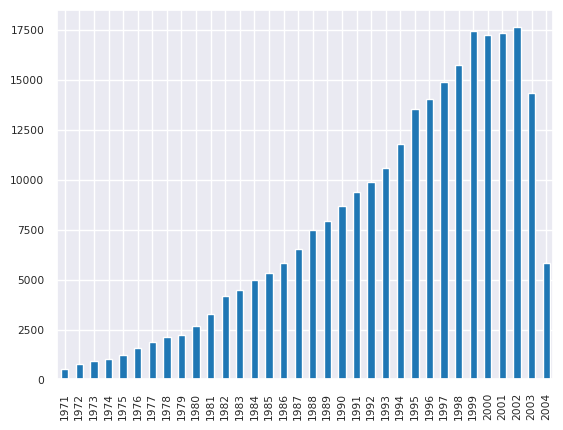

In [50]:
books[(books['Year-Of-Publication'] > 1970) & (books['Year-Of-Publication'] < 2005)]['Year-Of-Publication'].value_counts().sort_index().plot(kind='bar')

It seems like most of the books in our dataset are published between 1970 and 2004.

<Axes: title={'center': 'Top 10 Most Frequent Publishers'}, xlabel='Publisher', ylabel='Books Published'>

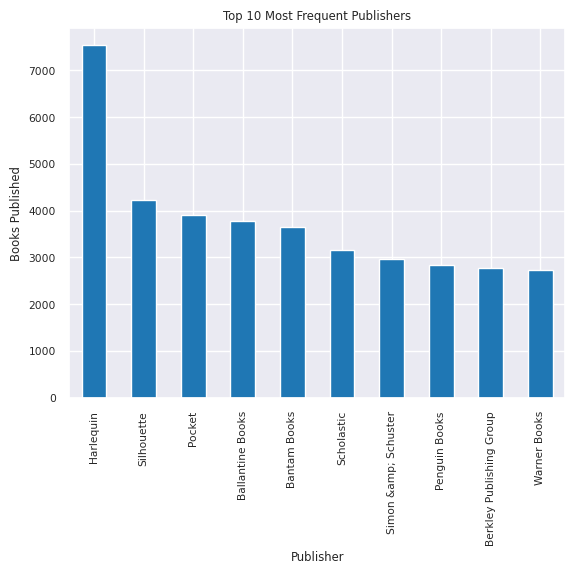

In [55]:
books['Publisher'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Frequent Publishers', xlabel='Publisher', ylabel='Books Published')

<Axes: title={'center': 'Top 10 Most Frequent Authors'}, xlabel='Author', ylabel='Books Written'>

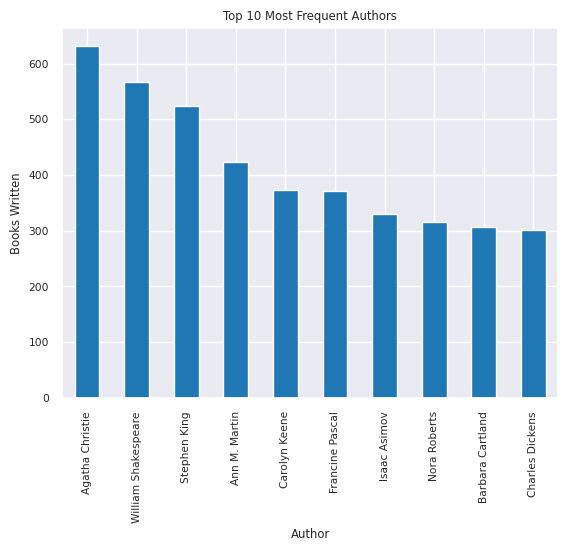

In [56]:
books['Book-Author'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Frequent Authors', xlabel='Author', ylabel='Books Written')

It can be seen that Agatha Christie, William Shakespeare and Stephen King are the most famous authors in our dataset.

Its time to analyze our ratings dataset. So first of all, let's check its ratings distribution across the entire dataset.

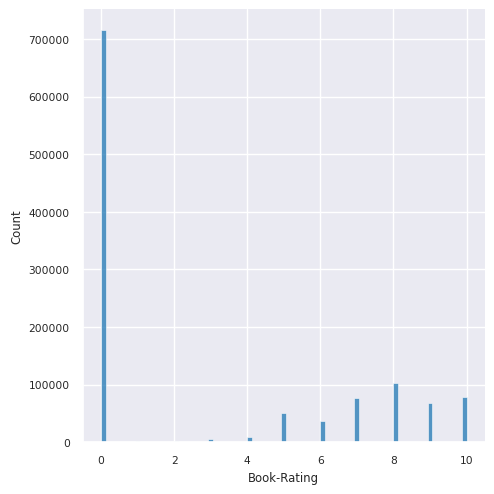

In [59]:
sns.displot(data=ratings, x='Book-Rating')

It can be seen that around 700000 books are rated 0. Additionally very few books are rated between 5 and 10.

In [62]:
ratings['User-ID'].value_counts().head(10)

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: User-ID, dtype: int64

These are the top 10 users with most ratings in our dataset.